TASK 1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Read the image (Make sure the path is correct)
image_path = "/content/Lena_Image.png"
image_bgr = cv2.imread(image_path)

# 2. Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

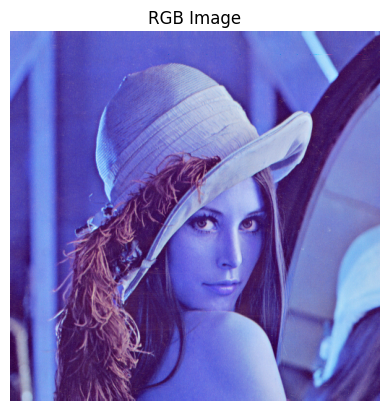

Image Size: 512x512, Channels: 3
Total Pixels: 262144


In [ ]:
# 3. Display the BGR image
plt.imshow(image_bgr)
plt.title("RGB Image")
plt.axis("off")
plt.show()

# 4. Extract image size
height, width, channels = image_bgr.shape
print(f"Image Size: {width}x{height}, Channels: {channels}")

# 5. Calculate the total number of pixels
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

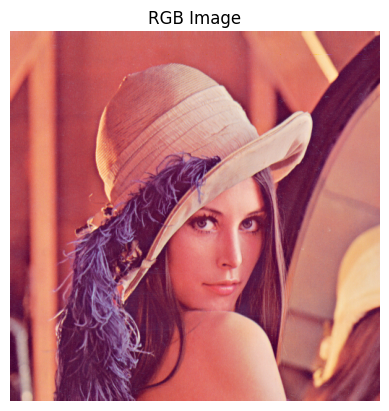

Image Size: 512x512, Channels: 3
Total Pixels: 262144


In [ ]:
# 3. Display the RGB image
plt.imshow(image_rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()

# 4. Extract image size
height, width, channels = image_rgb.shape
print(f"Image Size: {width}x{height}, Channels: {channels}")

# 5. Calculate the total number of pixels
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")


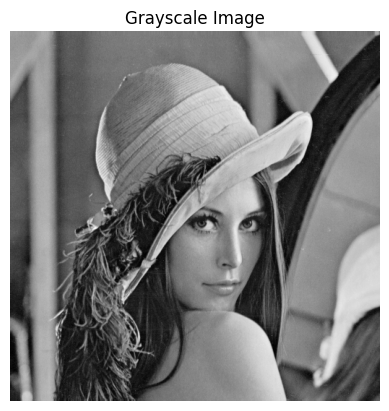

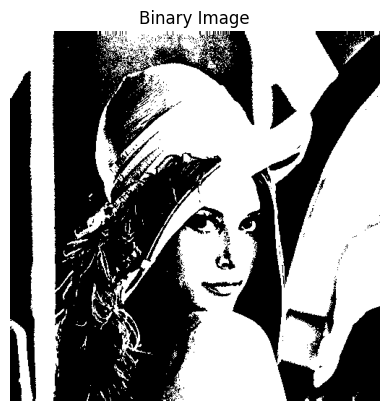

Black Pixel Count: 130547
Total Image Size (in pixels): 262144


In [ ]:
# 6. Convert RGB to Grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Save the grayscale image
cv2.imwrite("/content/Lena_Grayscale.png", image_gray)

# Display the Grayscale image
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# 7. Convert Grayscale to Binary using a threshold
threshold_value = 128  # You can adjust this threshold
_, image_binary = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)

# Save the binary image
cv2.imwrite("/content/Lena_Binary.png", image_binary)

# Display the Binary image
plt.imshow(image_binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

# 8. Count black pixels in the binary image
black_pixel_count = np.sum(image_binary == 0)
print(f"Black Pixel Count: {black_pixel_count}")
print(f"Total Image Size (in pixels): {total_pixels}")

TASK 2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import filters, segmentation

In [ ]:
# Load Image
image_path = "/content/Lena_Image.png"
image_bgr = cv2.imread(image_path)

# Convert to Grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Display Function
def display_image(title, img, cmap="gray"):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

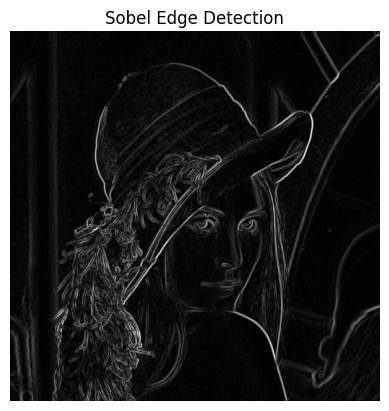

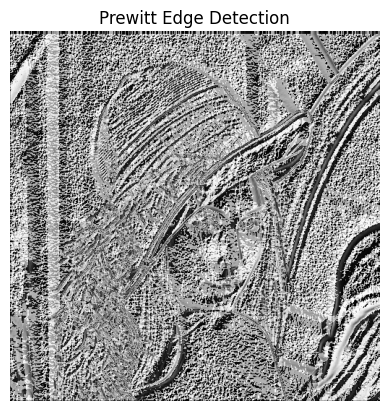

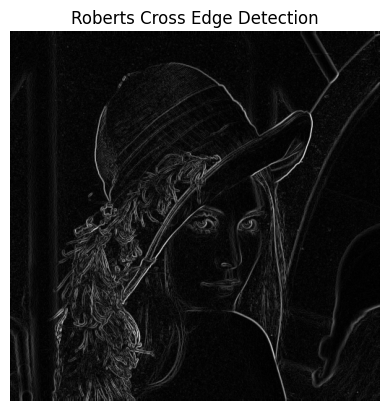

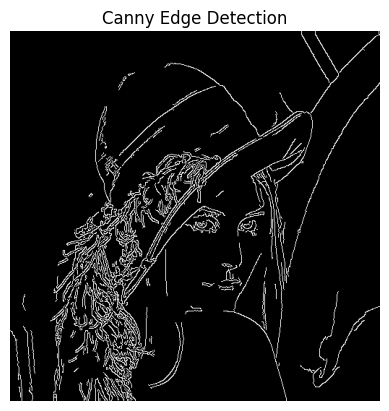

In [ ]:
# 1. Edge Detection

## i. Sobel Operator
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)
display_image("Sobel Edge Detection", sobel_edges)

## ii. Prewitt Operator
prewitt_x = ndimage.prewitt(image_gray, axis=0)
prewitt_y = ndimage.prewitt(image_gray, axis=1)
prewitt_edges = np.hypot(prewitt_x, prewitt_y)
display_image("Prewitt Edge Detection", prewitt_edges)

## iii. Roberts Cross Operator
from skimage.filters import roberts
roberts_edges = roberts(image_gray)
display_image("Roberts Cross Edge Detection", roberts_edges)

## iv. Canny Edge Detection
canny_edges = cv2.Canny(image_gray, 100, 200)
display_image("Canny Edge Detection", canny_edges)

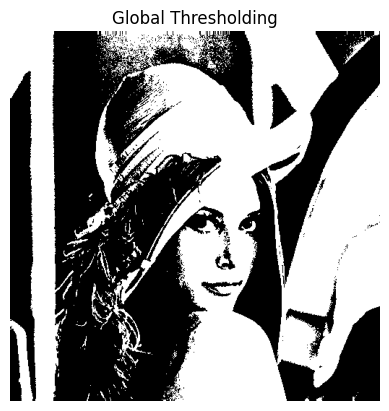

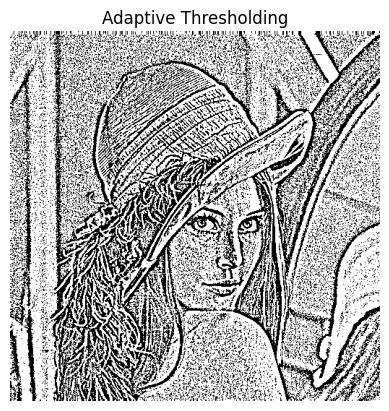

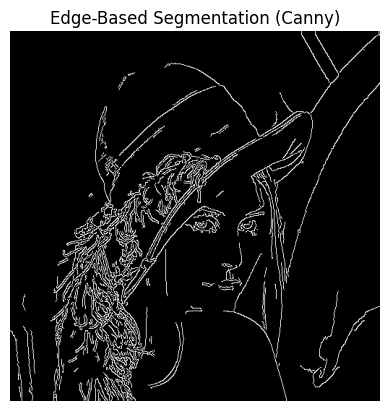

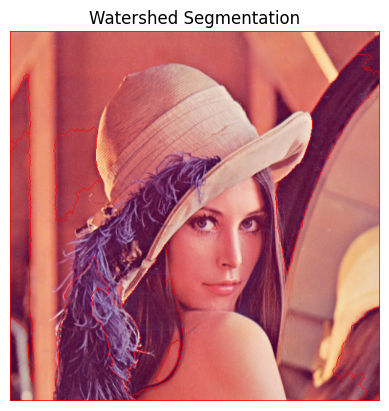

In [ ]:
# 2. Image Segmentation

## i. Global Thresholding
_, global_thresh = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY)
display_image("Global Thresholding", global_thresh)

## ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)
display_image("Adaptive Thresholding", adaptive_thresh)

## iii. Edge Detection for Segmentation (Using Canny)
display_image("Edge-Based Segmentation (Canny)", canny_edges)

## iv. Region-Based Segmentation (Watershed Algorithm)
# Convert to RGB for Watershed
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Apply Otsu Thresholding
_, thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove Noise
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure Background Area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure Foreground Area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown Region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker Labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed Algorithm
cv2.watershed(image_rgb, markers)
image_rgb[markers == -1] = [255, 0, 0]

display_image("Watershed Segmentation", image_rgb, cmap=None)